In [52]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [54]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [55]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
X_train.shape, X_test.shape

((712, 2), (179, 2))

In [58]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [59]:
X_train.tail()

,Age,Fare,Age_imputed
835,39.0,83.1583,39.0
192,19.0,7.8542,19.0
629,NaN,7.7333,NaN
559,36.0,17.4000,36.0
684,60.0,39.0000,60.0


In [60]:
X_train.loc[X_train['Age_imputed'].isnull(), 'Age_imputed'] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

X_test.loc[X_test['Age_imputed'].isnull(), 'Age_imputed'] = X_test['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [61]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([22.  ,  4.  , 19.  , 24.  , 15.  , 29.  , 30.  , 11.  , 42.  ,
       22.  ,  4.  , 28.  ,  0.67, 26.  , 22.  , 36.  , 32.  , 36.  ,
       22.  , 33.  , 25.  , 30.  , 19.  , 62.  , 11.  , 47.  , 37.  ,
        3.  , 21.  , 53.  , 39.  , 22.  , 16.  , 33.  , 18.  , 22.  ,
       19.  , 65.  , 41.  , 45.  , 38.  , 31.  ,  6.  , 18.  , 37.  ,
       61.  , 64.  , 27.  , 37.  , 31.  , 24.  , 55.  , 56.  , 27.  ,
       20.  , 45.  , 34.  , 57.  , 16.  , 35.  , 24.  , 34.  , 62.  ,
       38.  , 47.  , 45.  , 41.  , 30.  , 36.  , 39.  , 18.  ,  2.  ,
       31.  , 18.  , 58.  , 54.  , 32.  , 19.  , 15.  , 17.  , 22.  ,
       34.5 , 32.5 , 39.  , 47.  , 24.  , 31.  ,  6.  , 39.  , 50.  ,
       30.  , 16.  , 36.  , 39.  , 61.  , 18.  , 40.  , 24.  , 48.  ,
       38.  , 58.  , 32.  , 32.  , 65.  , 32.  , 48.  , 23.  , 25.  ,
       22.  , 22.  , 45.  , 16.  , 26.  , 39.  ,  1.  , 25.  , 49.  ,
       26.  , 24.  ,  8.  , 28.  , 36.  , 43.  , 32.  , 18.  , 32.  ,
       71.  , 22.  ,

In [62]:
X_train['Age'].isnull().sum()

141

In [63]:
X_train

,Age,Fare,Age_imputed
140,NaN,15.2458,70.5
439,31.0,10.5000,31.0
817,31.0,37.0042,31.0
378,20.0,4.0125,20.0
491,21.0,7.2500,21.0
...,...,...,...
835,39.0,83.1583,39.0
192,19.0,7.8542,19.0
629,NaN,7.7333,22.0
559,36.0,17.4000,36.0


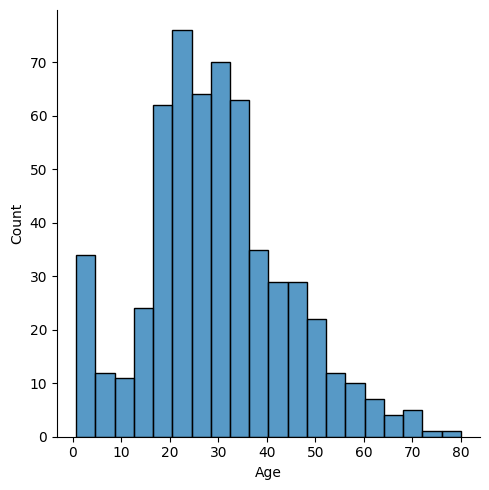

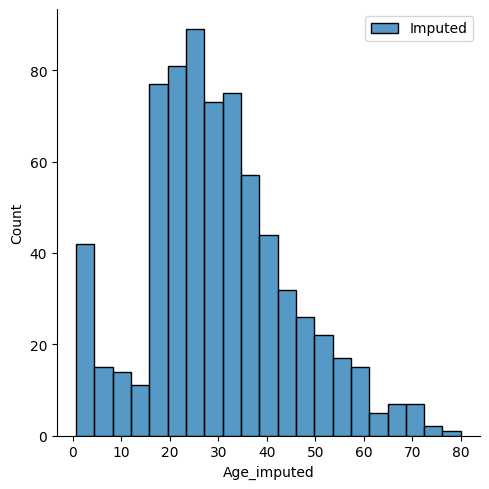

In [64]:
sns.displot(X_train['Age'],label='Original')
sns.displot(X_train['Age_imputed'],label = 'Imputed')

plt.legend()
plt.show()

In [65]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  213.7165085187575
Variance after random imputation:  220.71188542940783


In [66]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2513.549265,79.072379,62.132194
Age,79.072379,213.716509,213.716509
Age_imputed,62.132194,213.716509,220.711885


<Axes: >

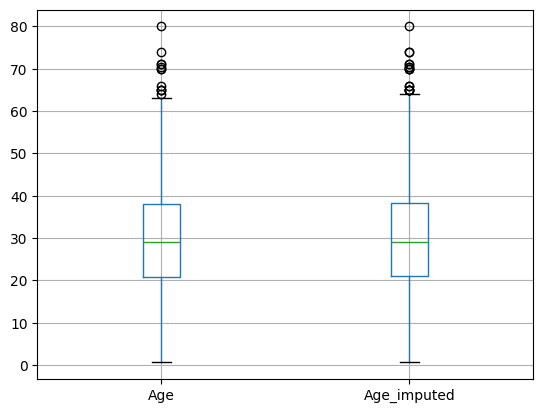

In [67]:
X_train[['Age', 'Age_imputed']].boxplot()

In [68]:
# Define the observation, for example, selecting the first row of X_train
observation = X_train.iloc[0]

# Sample a value from the 'Age' column based on the 'Fare' of the observation
sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))